First we import the necessary packages and load the CSv file of the pair GBPUSD into a pandas dataframe

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('GBPUSD=X.csv')
data.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-10,1.359083,1.360193,1.353418,1.359231,1.359231,0
1,2022-01-11,1.358170,1.362416,1.356282,1.358031,1.358031,0
2,2022-01-12,1.363401,1.369938,1.362212,1.363327,1.363327,0
3,2022-01-13,1.370689,1.374949,1.370558,1.370999,1.370999,0
4,2022-01-14,1.371291,1.374193,1.366770,1.371366,1.371366,0
...,...,...,...,...,...,...,...
251,2022-12-27,1.208357,1.211226,1.200336,1.208415,1.208415,0
252,2022-12-28,1.202776,1.212415,1.200336,1.202733,1.202733,0
253,2022-12-29,1.203297,1.207584,1.201548,1.202848,1.202848,0
254,2022-12-30,1.205662,1.210683,1.201273,1.205633,1.205633,0


Here I ploted the price chart using matplotlib

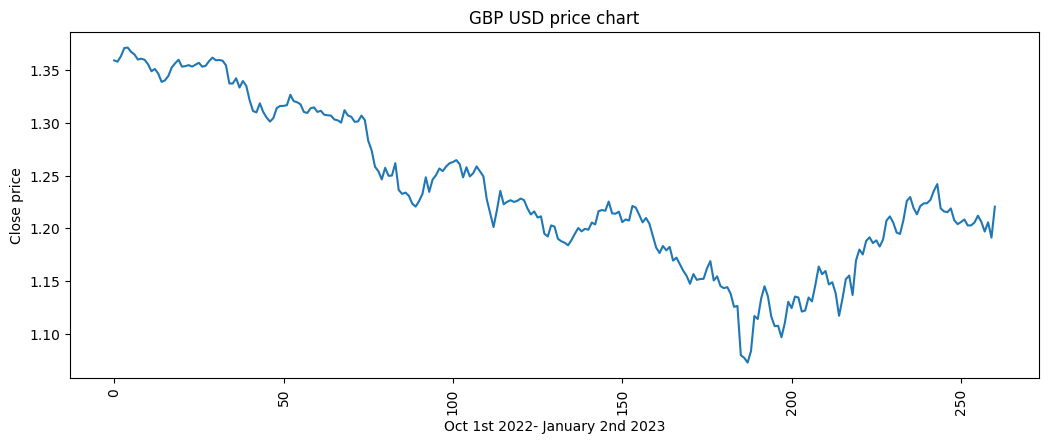

In [256]:
plt.figure(figsize=(12.5,4.5))
sns.lineplot(data = data, y = 'Adj Close', x = data.index)
plt.ylabel('Close price')
plt.title('GBP USD price chart')
plt.xticks(rotation = 90)
plt.xlabel('Oct 1st 2022- January 2nd 2023')
plt.show()

I create a functional that returns the rolling mean with the days as a parameter into the function, this as I can just adjust the days parameter and get simle moving averages of different timeframes

In [257]:
# Now we can make a simple moving average
def SMA(days):
    SMA = pd.DataFrame()
    SMA['Adjusted Close'] = data['Adj Close'].rolling(days).mean()
    return SMA
SMA10 = SMA(10)
SMA30 = SMA(30)



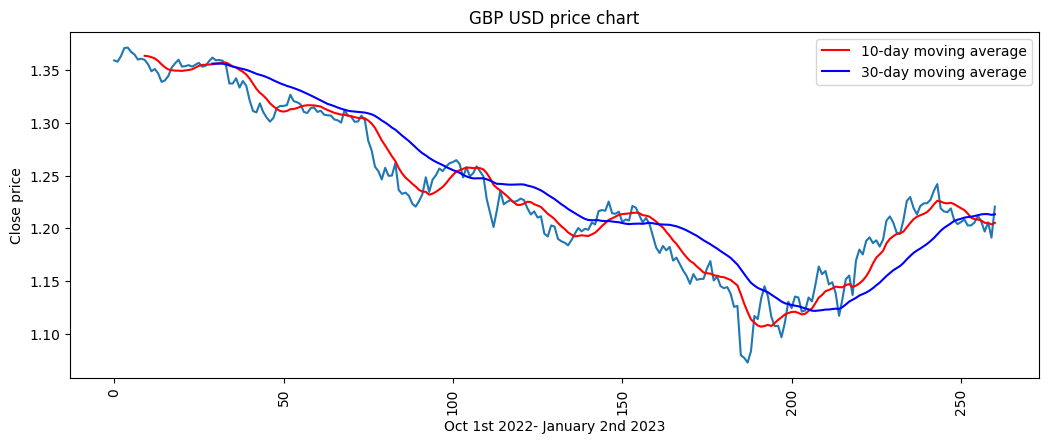

In [258]:
plt.figure(figsize=(12.5,4.5))
sns.lineplot(data = data, y = 'Adj Close', x = data.index)
plt.plot(SMA10, label = '10-day moving average', color= 'Red')
plt.plot(SMA30, label = '30-day moving average', color= 'Blue')
plt.ylabel('Close price')
plt.title('GBP USD price chart')
plt.xticks(rotation = 90)
plt.xlabel('Oct 1st 2022- January 2nd 2023')
plt.legend(loc='upper right')
plt.show()

In [259]:
df1 = pd.DataFrame()
df1['Price'] = data['Adj Close']
df1['SMA10'] = SMA10
df1['SMA30'] = SMA30
df1

,Price,SMA10,SMA30
0,1.359231,NaN,NaN
1,1.358031,NaN,NaN
2,1.363327,NaN,NaN
3,1.370999,NaN,NaN
4,1.371366,NaN,NaN
...,...,...,...
256,1.206287,1.207460,1.213287
257,1.196974,1.205266,1.213538
258,1.205705,1.205062,1.213483
259,1.191228,1.203786,1.212812


I will then create a function that will look for buy and sell opportunities based on moving average crossovers between the 10 day and the 30 day moving averages.

In [260]:
# Create a function that will return the buy and sell price, then we will use that to plot of the chart.
def buy_sell(data):
    SigPriceBuy = []
    SigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data['SMA10'][i] > data['SMA30'][i]:
            if flag != 1:
                SigPriceBuy.append(data['Price'][i])
                SigPriceSell.append(np.nan)
                flag = 1
            else:
                SigPriceBuy.append(np.nan)
                SigPriceSell.append(np.nan)
        elif data['SMA10'][i] < data['SMA30'][i]:
            if flag != 0:
                SigPriceBuy.append(np.nan)
                SigPriceSell.append(data['Price'][i])
                flag = 0
            else:
                SigPriceBuy.append(np.nan)
                SigPriceSell.append(np.nan)
        else:
            SigPriceBuy.append(np.nan)
            SigPriceSell.append(np.nan)
    return (SigPriceBuy, SigPriceSell)
            


In [261]:
buy_sell = buy_sell(df1)
df1['Buy'] = buy_sell[0]
df1['Sell'] = buy_sell[1]
df1.index

RangeIndex(start=0, stop=261, step=1)

I then plot the markers of buy and sell onto the price chart which will then show where you would buy and sell over time.

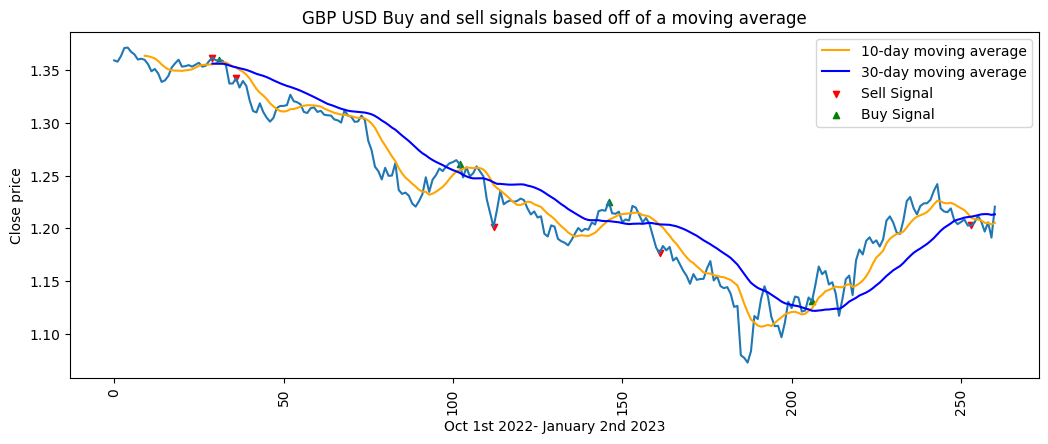

In [262]:
# Visualise the data
plt.figure(figsize=(12.5,4.5))
sns.lineplot(data = data, y = 'Adj Close', x = data.index)
plt.plot(SMA10, label = '10-day moving average', color= 'Orange')
plt.plot(SMA30, label = '30-day moving average', color= 'Blue')
plt.scatter(x = df1.index, y= df1['Sell'], s = 20, color = 'red', marker = 'v', label = 'Sell Signal')
plt.scatter(x = df1.index, y= df1['Buy'], s = 20, color = 'Green', marker = '^', label = 'Buy Signal')
plt.ylabel('Close price')
plt.title('GBP USD Buy and sell signals based off of a moving average')
plt.xticks(rotation = 90)
plt.xlabel('Oct 1st 2022- January 2nd 2023')
plt.legend(loc='upper right')
plt.show()